<a href="https://colab.research.google.com/github/DinhQuocTuan0108/Bai-tap/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PHÂN TÍCH DỮ LIỆU BỆNH NHÂN 
#Age related Macular Degeneration(A)
#Cataract (C)
#Diabetes (D)
#Glaucoma (G)
#Hypertension (H)
#Other diseases/abnormalities (O)
#Normal(N)
#Pathological Myopia (M)

In [46]:
# Khai báo và sử dụng các thư viện sau
import numpy as np
import seaborn as sns 
import shutil
import csv
import pandas as pd 
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
china = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/project/data.csv")
china_melted = china.drop(china.columns[list(range(3,14))+list(range(18,19))], axis=1)
china_melted.head(500)

ID  Patient Age Patient Sex  O  \
0      0           69      Female  0   
1      1           57        Male  0   
2      2           42        Male  1   
3      4           53        Male  1   
4      5           50      Female  0   
..   ...          ...         ... ..   
495  565           59      Female  0   
496  566           60        Male  1   
497  567           60        Male  0   
498  569           64        Male  0   
499  570           65      Female  1   

                                              filepath labels  \
0    ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
1    ../input/ocular-disease-recognition-odir5k/ODI...  ['N']   
2    ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
3    ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
4    ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
..                                                 ...    ...   
495  ../input/ocular-disease-recognition-odir5k/ODI...  ['A']   
496  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
497  ../input/ocular-disease-recognition-odir5k/ODI...  ['M']   
498  ../input/ocular-disease-recognition-odir5k/ODI...  ['D']   
499  ../input/ocular-disease-recognition-odir5k/ODI...  ['O']   

                       target  
0    [1, 0, 0, 0, 0, 0, 0, 0]  
1    [1, 0, 0, 0, 0, 0, 0, 0]  
2    [0, 1, 0, 0, 0, 0, 0, 0]  
3    [0, 1, 0, 0, 0, 0, 0, 0]  
4    [0, 1, 0, 0, 0, 0, 0, 0]  
..                        ...  
495  [0, 0, 0, 0, 1, 0, 0, 0]  
496  [0, 1, 0, 0, 0, 0, 0, 0]  
497  [0, 0, 0, 0, 0, 0, 1, 0]  
498  [0, 1, 0, 0, 0, 0, 0, 0]  
499  [0, 0, 0, 0, 0, 0, 0, 1]  

[500 rows x 7 columns]

In [48]:
string_labels = []
for each in china_melted.labels:
    if(len(each)==5):
        string_labels.append(each[2])
    else:
        print(each)

In [49]:
china_melted.drop('filepath',axis=1).head(500)

ID  Patient Age Patient Sex  O labels                    target
0      0           69      Female  0  ['N']  [1, 0, 0, 0, 0, 0, 0, 0]
1      1           57        Male  0  ['N']  [1, 0, 0, 0, 0, 0, 0, 0]
2      2           42        Male  1  ['D']  [0, 1, 0, 0, 0, 0, 0, 0]
3      4           53        Male  1  ['D']  [0, 1, 0, 0, 0, 0, 0, 0]
4      5           50      Female  0  ['D']  [0, 1, 0, 0, 0, 0, 0, 0]
..   ...          ...         ... ..    ...                       ...
495  565           59      Female  0  ['A']  [0, 0, 0, 0, 1, 0, 0, 0]
496  566           60        Male  1  ['D']  [0, 1, 0, 0, 0, 0, 0, 0]
497  567           60        Male  0  ['M']  [0, 0, 0, 0, 0, 0, 1, 0]
498  569           64        Male  0  ['D']  [0, 1, 0, 0, 0, 0, 0, 0]
499  570           65      Female  1  ['O']  [0, 0, 0, 0, 0, 0, 0, 1]

[500 rows x 6 columns]

In [50]:
china_melted = china_melted.drop(china_melted.columns[[0, 3, 4]], axis=1)
china_melted = pd.concat([china_melted, pd.DataFrame(string_labels, columns = ['Bệnh'])], axis=1)

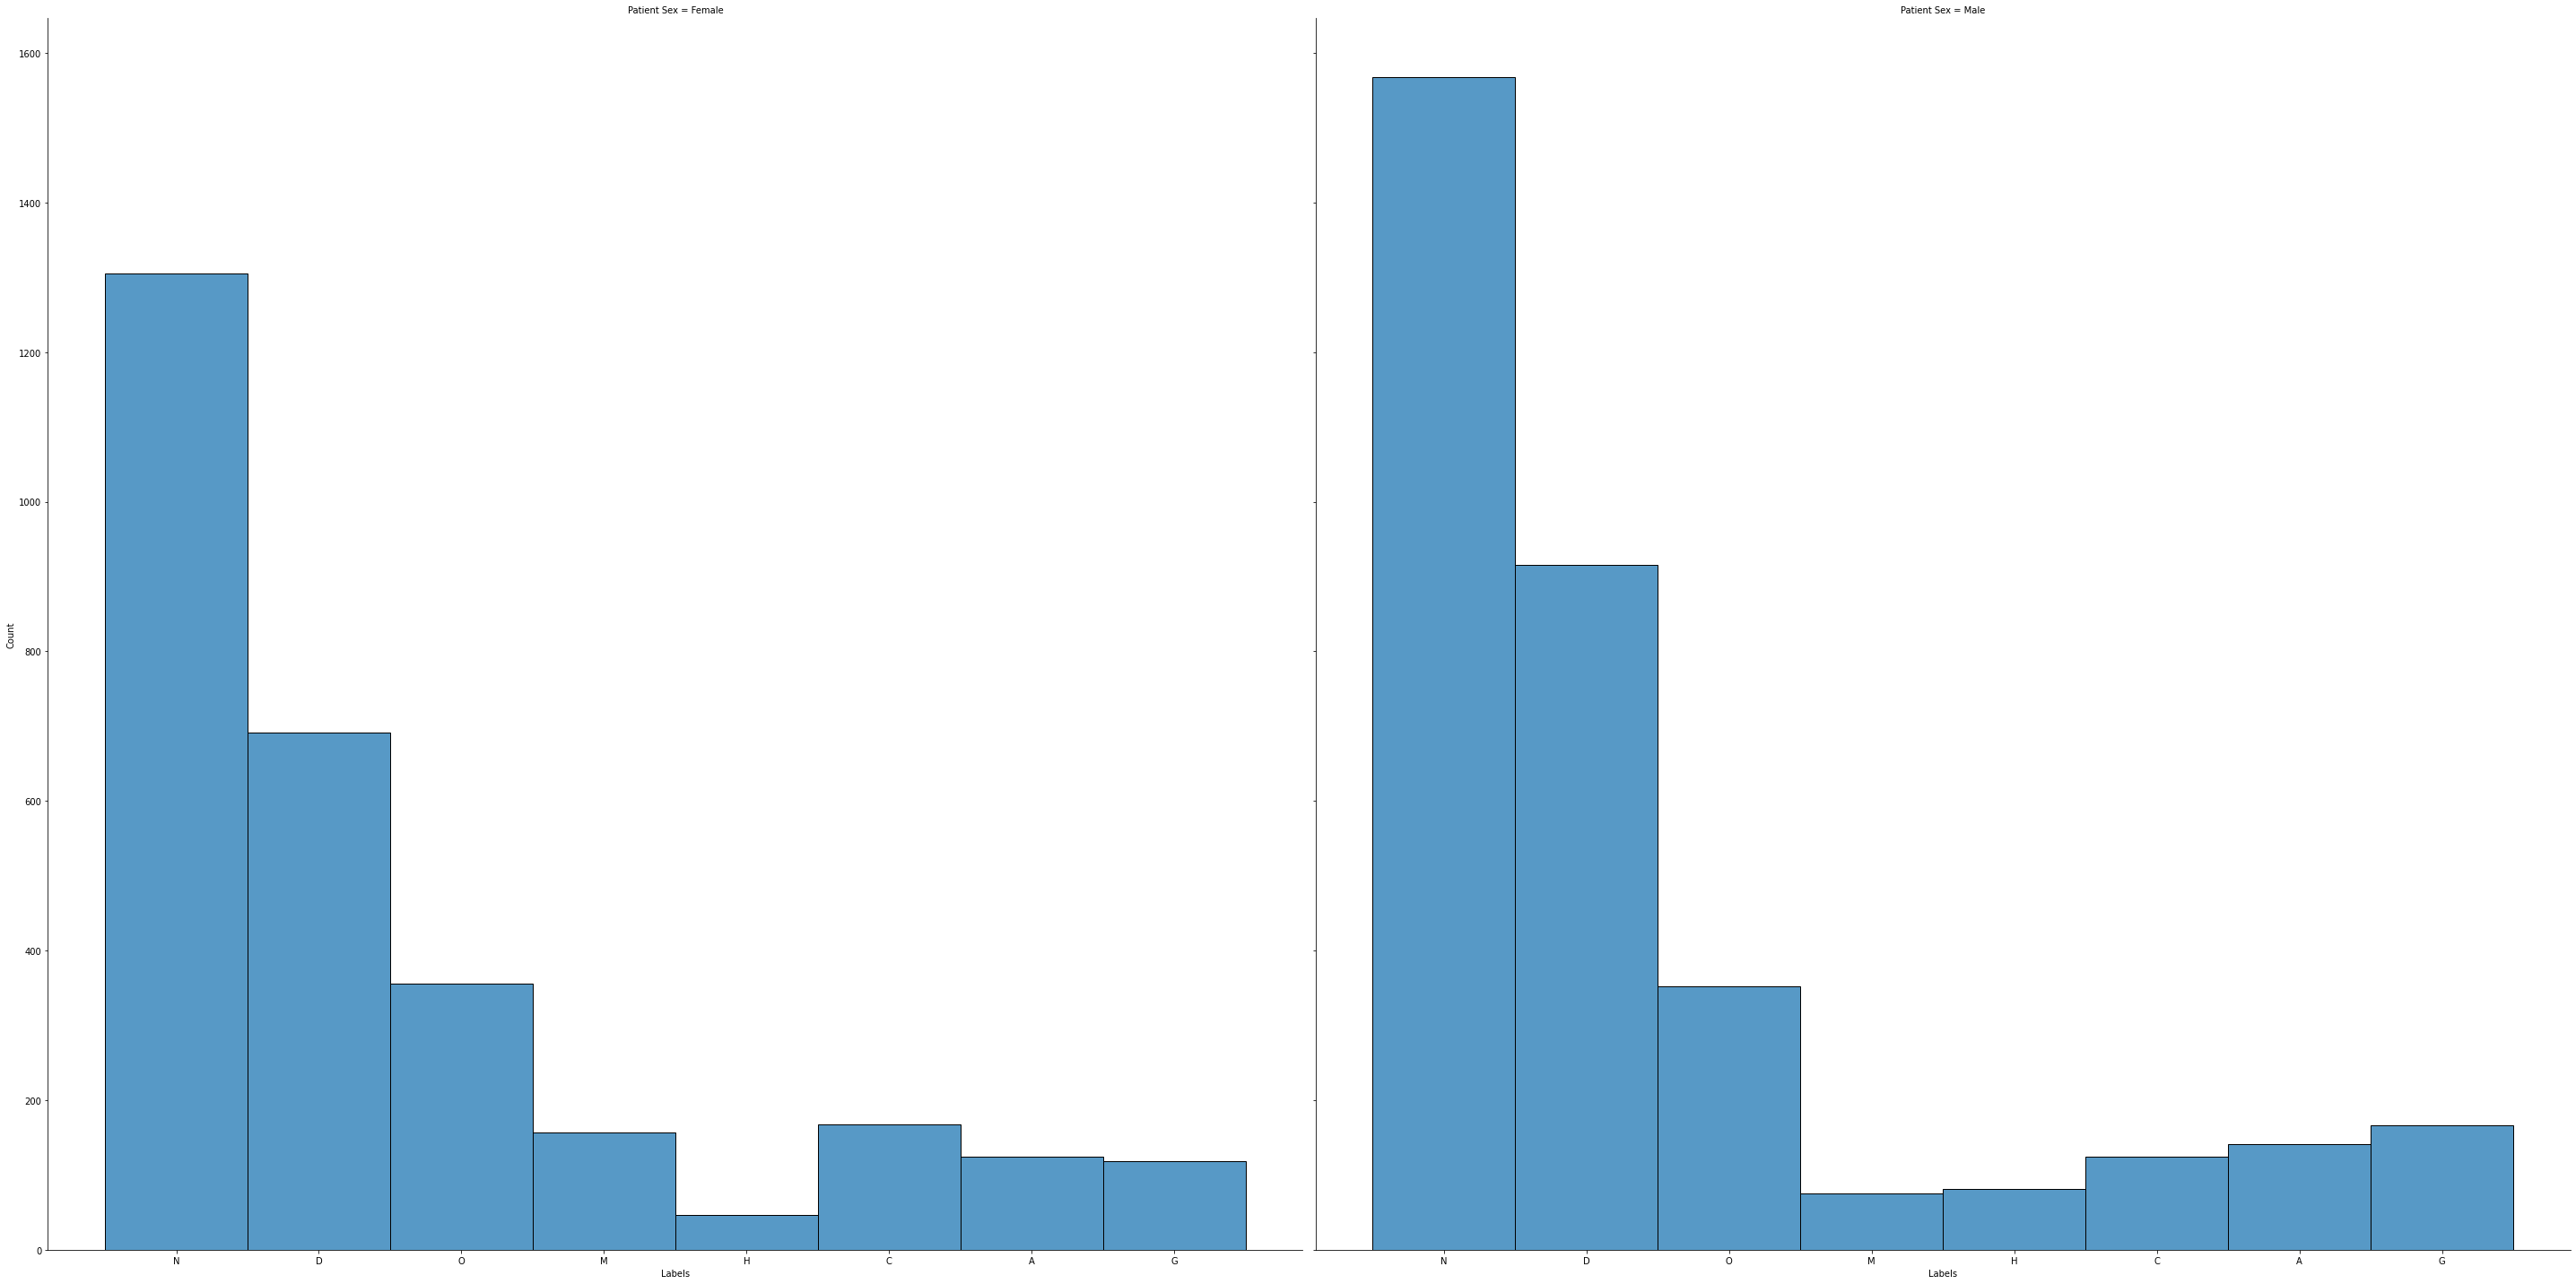

In [52]:
sns.displot(data_melted, x="Labels", col="Patient Sex",
    binwidth=10, height=20, facet_kws=dict(margin_titles=True),)
plt.show()

In [53]:
sns.displot(data_melted, x="Labels", col="Patient Sex", row='Patient Age',
    binwidth=12, height=10, facet_kws=dict(margin_titles=True),)
plt.show()

In [56]:
def check_disease(df,start,end):
    df = df.iloc[:, start:end]
    disease_name, zeroCount, oneCount = [], [], []
    rowLen = len(df)
    for (column_name, column) in df.iteritems():
        disease_name.append(column_name)    
        zeroCount.append(df[column_name].value_counts()[0])
    oneCount = [rowLen - x for x in zeroCount]
    
    return disease_name, zeroCount, oneCount

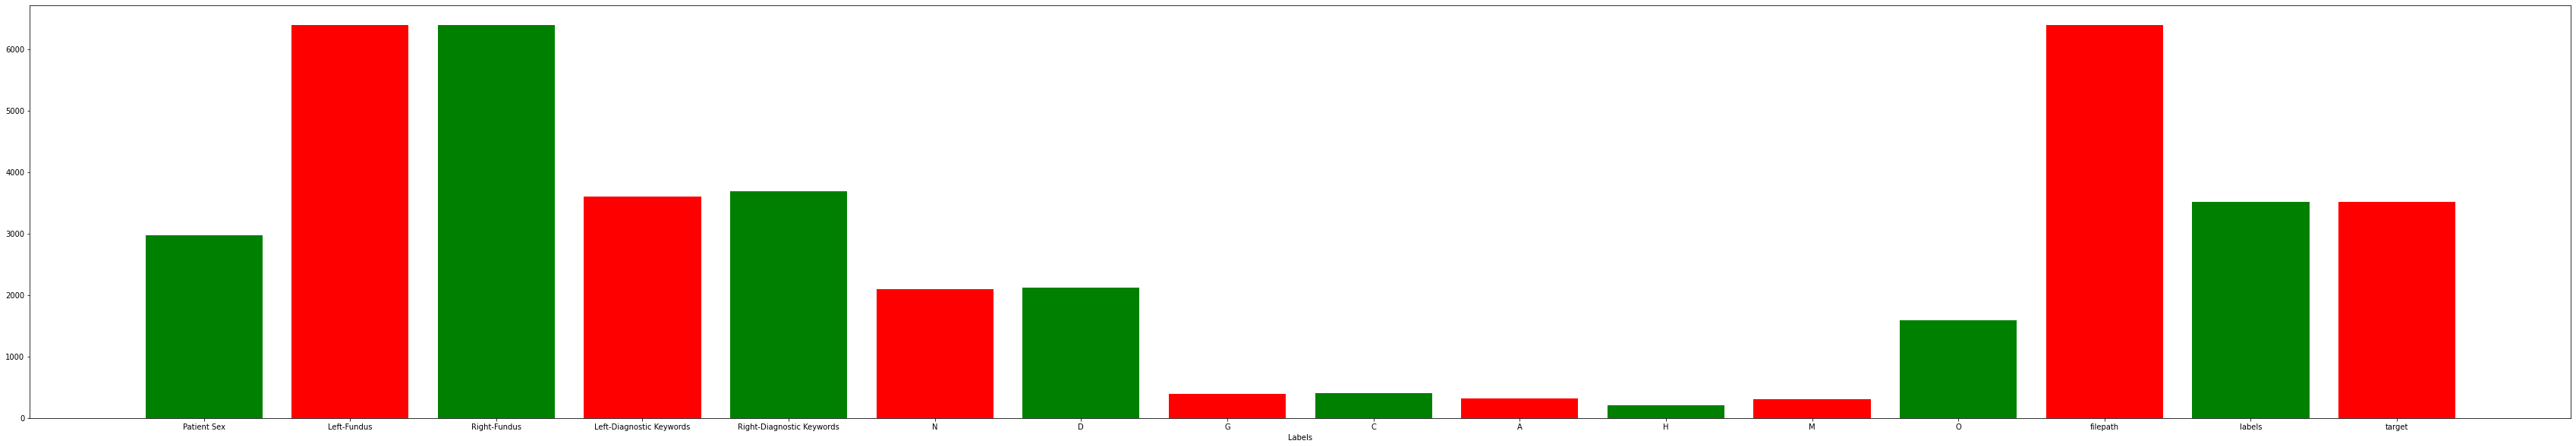

In [73]:
disease_name, zeroCount, oneCount = check_disease(data,2,18)
fig = plt.figure(figsize=(60, 10))
plt.bar(disease_name, oneCount, width=0.8, color=['green', 'red'])
plt.xlabel('Labels')
plt.savefig('Total.png')

In [75]:
data=data.drop(columns=['N', 'D', 'H', 'O' ],axis=1)
data=data[((data['G'] == 1) | (data['C'] == 1) | (data['A']== 1) | (data['M'] == 1))]
classes=['G', 'C', 'A', 'M']
data = data.reset_index(drop=True)

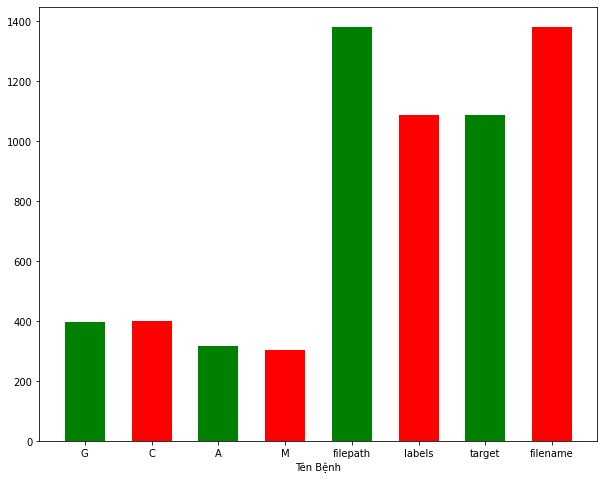

In [76]:
disease_name, zeroCount, oneCount = check_disease(data,7,15)

fig = plt.figure(figsize=(10, 8))
plt.bar(disease_name, oneCount, width=0.6, color=['green', 'red'])
plt.xlabel('Labels')
plt.savefig('Total2.png')

In [77]:
def plot_count(feature, title, df, size=1, show_all=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if show_all:
        g = sns.countplot(df[feature], palette='Set3')
        g.set_title("{} distribution".format(title))
    else:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
        if(size > 2):
            plt.xticks(rotation=90, size=8)
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 0.2,
                        '{:1.2f}%'.format(100*height/total),
                        ha="center") 
        g.set_title("Number and percentage of {}".format(title))
    plt.show() 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


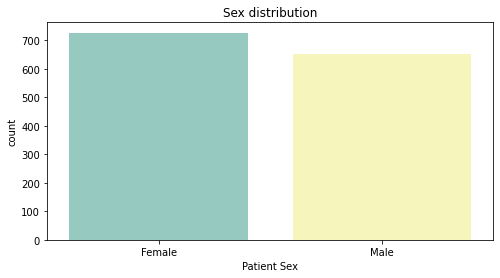

In [90]:
plot_count("Patient Sex", "Sex", data, size=2, show_all=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


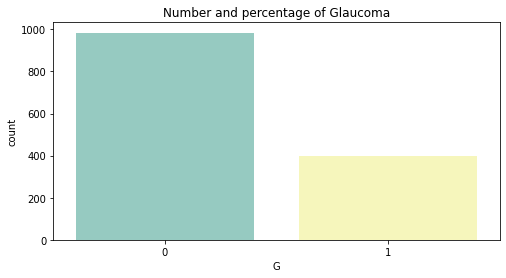

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


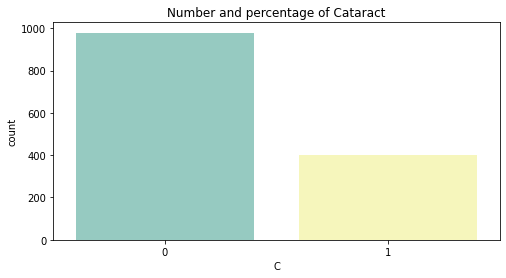

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


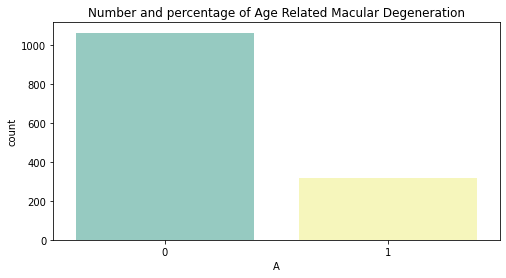

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


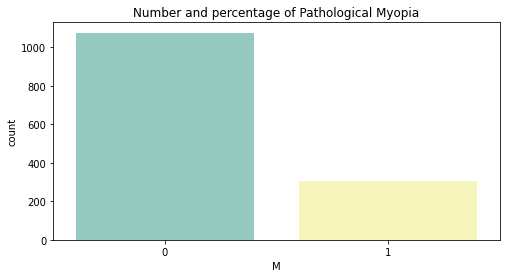

In [88]:
plot_count("G", "Glaucoma", data, size=2)
plot_count("C", "Cataract", data, size=2)
plot_count("A", "Age Related Macular Degeneration", data, size=2)
plot_count("M", "Pathological Myopia", data, size=2)

In [91]:
def plot_feature_distribution_grouped(feature, title, df, hue, size=4):
    plt.figure(figsize=(size*5,size*2))
    plt.title(title)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    g = sns.countplot(df[feature], hue=df[hue], palette='Set3')
    plt.xlabel(feature)
    plt.legend()
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


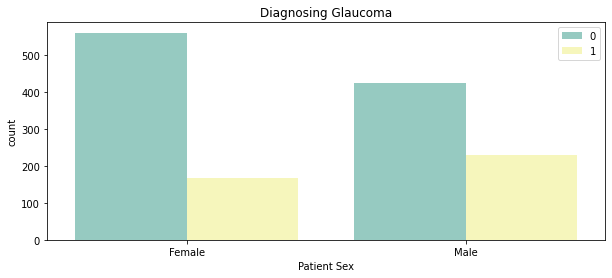

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


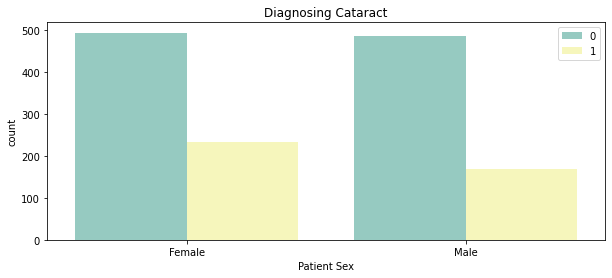

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


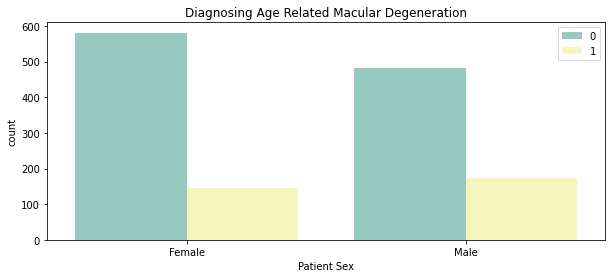

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


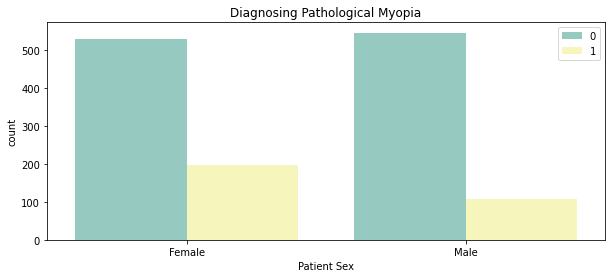

In [92]:
plot_feature_distribution_grouped('Patient Sex', 'Diagnosing Glaucoma', data, 'G', size=2)
plot_feature_distribution_grouped('Patient Sex', 'Diagnosing Cataract', data, 'C', size=2)
plot_feature_distribution_grouped('Patient Sex', 'Diagnosing Age Related Macular Degeneration', data, 'A', size=2)
plot_feature_distribution_grouped('Patient Sex', 'Diagnosing Pathological Myopia', data, 'M', size=2)

In [93]:
csvfile = r"/content/drive/MyDrive/Colab_Notebooks/project/data.csv"
source_folder = r"A:\Desktop\AI\Preprocessed_images"
destination_folder = r"A:\Desktop\AI\Other diseases_abnormalities"

with open(csvfile, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in (reader):
        source = row[0]
        destination = destination_folder + os.path.basename(source)
        if os.path.isfile(source):
            shutil.copy(source, destination)
            print('Moved: ', row)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


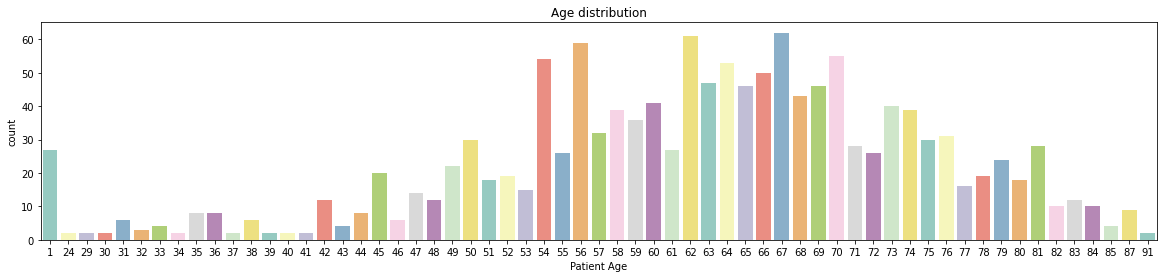

In [94]:
plot_count("Patient Age", "Age", data, size=5, show_all=True)

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/project/


/content/drive/MyDrive/Colab_Notebooks/project


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/project/TRAIN',target_size=(150,150),batch_size=32, class_mode='categorical')

Found 7439 images belonging to 8 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/project/VALIDATION',target_size=(150,150),batch_size=32, class_mode='categorical')

Found 7439 images belonging to 8 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Age related Macular Degeneration': 0,
 'Cataract': 1,
 'Diabetes': 2,
 'Glaucoma': 3,
 'Hypertension': 4,
 'Normal': 5,
 'Other diseases_abnormalities': 6,
 'Pathological Myopia': 7}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation_set.class_indices

{'Age related Macular Degeneration': 0,
 'Cataract': 1,
 'Diabetes': 2,
 'Glaucoma': 3,
 'Hypertension': 4,
 'Normal': 5,
 'Other diseases_abnormalities': 6,
 'Pathological Myopia': 7}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 8 tín hiệu ra
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 120 lần học (epochs), mỗi lần học thì chỉ học 256 dữ liệu (batch_size)
history=model.fit(training_set,epochs=120,batch_size=256,verbose=1)

Epoch 1/120
233/233 [==============================] - 5248s 22s/step - loss: 1.9606 - accuracy: 0.2820
Epoch 2/120
233/233 [==============================] - 79s 338ms/step - loss: 1.7303 - accuracy: 0.2935
Epoch 3/120
233/233 [==============================] - 79s 339ms/step - loss: 1.7131 - accuracy: 0.3070
Epoch 4/120
233/233 [==============================] - 78s 335ms/step - loss: 1.7057 - accuracy: 0.3119
Epoch 5/120
233/233 [==============================] - 80s 342ms/step - loss: 1.6882 - accuracy: 0.3147
Epoch 6/120
233/233 [==============================] - 80s 343ms/step - loss: 1.6819 - accuracy: 0.3203
Epoch 7/120
233/233 [==============================] - 78s 336ms/step - loss: 1.6611 - accuracy: 0.3259
Epoch 8/120
233/233 [==============================] - 79s 339ms/step - loss: 1.6166 - accuracy: 0.3467
Epoch 9/120
233/233 [==============================] - 78s 334ms/step - loss: 1.5564 - accuracy: 0.3635
Epoch 10/120
233/233 [==============================] - 79s 339m

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.4217376112937927
Train Accuracy 0.8189272880554199


<function matplotlib.pyplot.show(*args, **kw)>

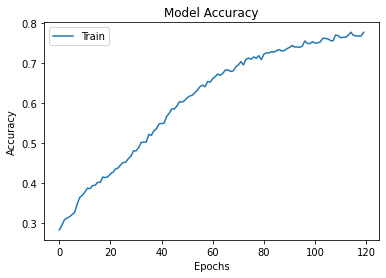

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [ ]:
model.save("project.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('project.h5')

1/1 [==============================] - 0s 17ms/step
BÌNH THƯỜNG


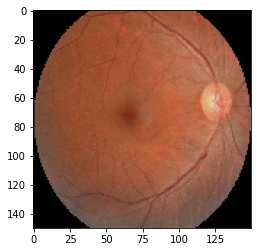

1/1 [==============================] - 0s 18ms/step
BỆNH LÝ KHÁC


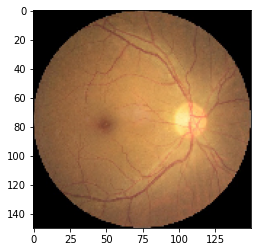

1/1 [==============================] - 0s 15ms/step
BÌNH THƯỜNG


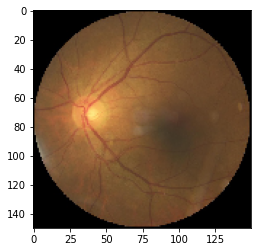

1/1 [==============================] - 0s 15ms/step
BÌNH THƯỜNG


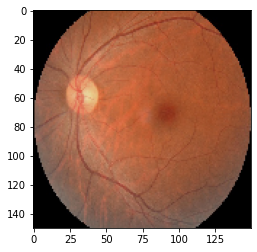

1/1 [==============================] - 0s 17ms/step
BÌNH THƯỜNG


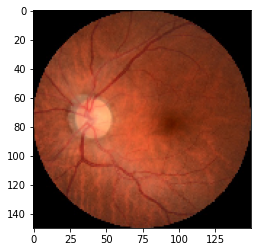

1/1 [==============================] - 0s 17ms/step
BÌNH THƯỜNG


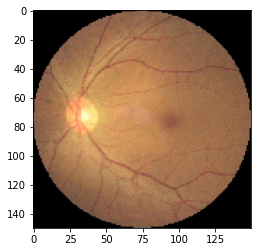

In [ ]:
#1. Mắt Bình Thường - (Normal)
test="/content/drive/MyDrive/Colab_Notebooks/project/Test/Normal"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='THOÁI HOÁ'
  if round(result[0][1])==1:
    prediction='ĐỤC THUỶ TINH THỂ'
  if round(result[0][2])==1:
    prediction='TIỂU ĐƯỜNG'
  if round(result[0][3])==1:
    prediction='TĂNG NHÃN ÁP'
  if round(result[0][4])==1:
    prediction='TĂNG HUYẾT ÁP'
  if round(result[0][5])==1:
    prediction='BÌNH THƯỜNG'
  if round(result[0][6])==1:
    prediction='BỆNH LÝ KHÁC'
  if round(result[0][7])==1:
    prediction='CẬN THỊ'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 38ms/step
TIỂU ĐƯỜNG


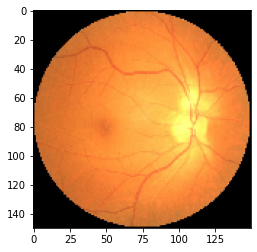

1/1 [==============================] - 0s 17ms/step
BỆNH LÝ KHÁC


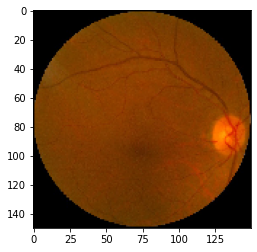

1/1 [==============================] - 0s 15ms/step
TIỂU ĐƯỜNG


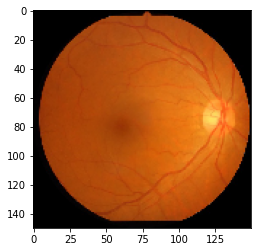

1/1 [==============================] - 0s 15ms/step
ĐỤC THUỶ TINH THỂ


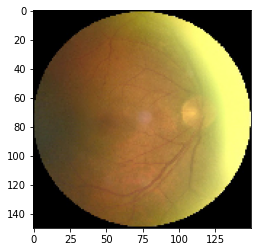

1/1 [==============================] - 0s 18ms/step
TIỂU ĐƯỜNG


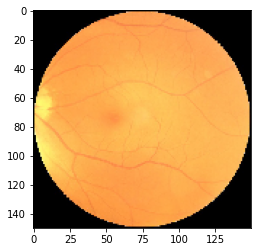

1/1 [==============================] - 0s 16ms/step
TIỂU ĐƯỜNG


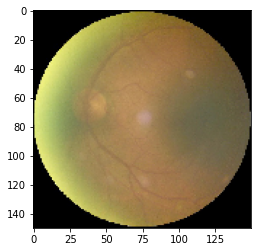

In [ ]:
# 2. Mắt Tiểu Đường  - Diabetes (D)
test="/content/drive/MyDrive/Colab_Notebooks/project/Test/Diabetes"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='THOÁI HOÁ'
  if round(result[0][1])==1:
    prediction='ĐỤC THUỶ TINH THỂ'
  if round(result[0][2])==1:
    prediction='TIỂU ĐƯỜNG'
  if round(result[0][3])==1:
    prediction='TĂNG NHÃN ÁP'
  if round(result[0][4])==1:
    prediction='TĂNG HUYẾT ÁP'
  if round(result[0][5])==1:
    prediction='BÌNH THƯỜNG'
  if round(result[0][6])==1:
    prediction='BỆNH LÝ KHÁC'
  if round(result[0][7])==1:
    prediction='CẬN THỊ'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 15ms/step
TĂNG NHÃN ÁP


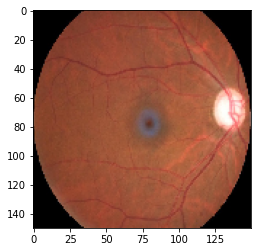

1/1 [==============================] - 0s 16ms/step
TĂNG NHÃN ÁP


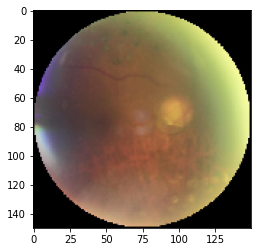

1/1 [==============================] - 0s 16ms/step
TĂNG NHÃN ÁP


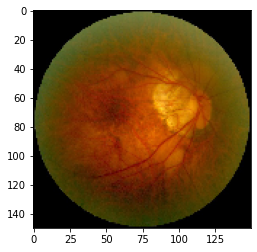

1/1 [==============================] - 0s 15ms/step
TĂNG NHÃN ÁP


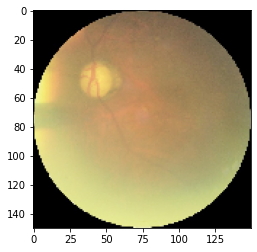

1/1 [==============================] - 0s 18ms/step
TĂNG NHÃN ÁP


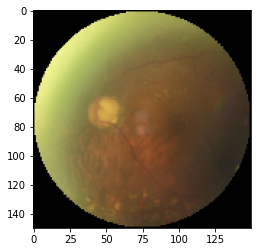

1/1 [==============================] - 0s 16ms/step
TĂNG NHÃN ÁP


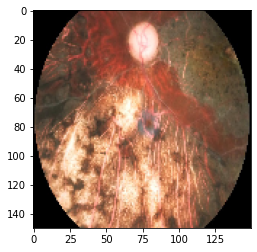

In [ ]:
# 3. Mắt Tăng nhãn áp  - Glaucom (G)
test="/content/drive/MyDrive/Colab_Notebooks/project/Test/Glaucoma"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='THOÁI HOÁ'
  if round(result[0][1])==1:
    prediction='ĐỤC THUỶ TINH THỂ'
  if round(result[0][2])==1:
    prediction='TIỂU ĐƯỜNG'
  if round(result[0][3])==1:
    prediction='TĂNG NHÃN ÁP'
  if round(result[0][4])==1:
    prediction='TĂNG HUYẾT ÁP'
  if round(result[0][5])==1:
    prediction='BÌNH THƯỜNG'
  if round(result[0][6])==1:
    prediction='BỆNH LÝ KHÁC'
  if round(result[0][7])==1:
    prediction='CẬN THỊ'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 15ms/step
ĐỤC THUỶ TINH THỂ


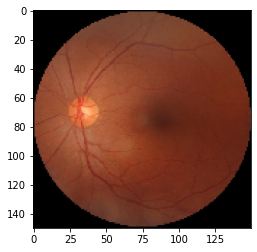

1/1 [==============================] - 0s 15ms/step
ĐỤC THUỶ TINH THỂ


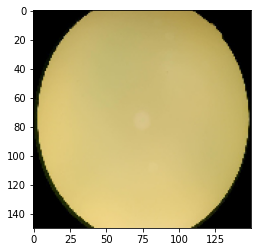

1/1 [==============================] - 0s 15ms/step
BỆNH LÝ KHÁC


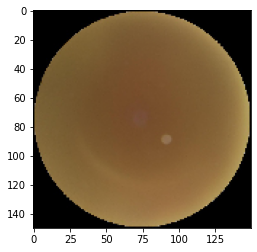

1/1 [==============================] - 0s 15ms/step
ĐỤC THUỶ TINH THỂ


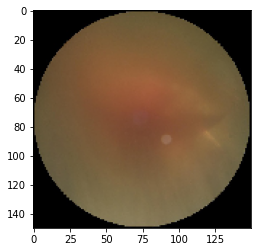

1/1 [==============================] - 0s 15ms/step
ĐỤC THUỶ TINH THỂ


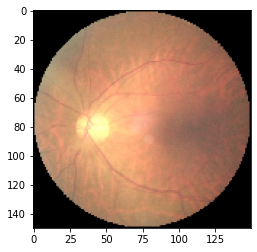

1/1 [==============================] - 0s 27ms/step
ĐỤC THUỶ TINH THỂ


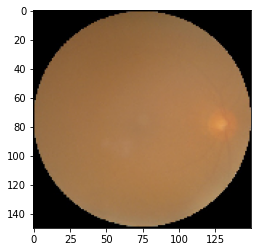

In [ ]:
# 4. Mắt Đục thủy tinh thể  - Cataract (C)
test="/content/drive/MyDrive/Colab_Notebooks/project/Test/Cataract"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='THOÁI HOÁ'
  if round(result[0][1])==1:
    prediction='ĐỤC THUỶ TINH THỂ'
  if round(result[0][2])==1:
    prediction='TIỂU ĐƯỜNG'
  if round(result[0][3])==1:
    prediction='TĂNG NHÃN ÁP'
  if round(result[0][4])==1:
    prediction='TĂNG HUYẾT ÁP'
  if round(result[0][5])==1:
    prediction='BÌNH THƯỜNG'
  if round(result[0][6])==1:
    prediction='BỆNH LÝ KHÁC'
  if round(result[0][7])==1:
    prediction='CẬN THỊ'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 15ms/step
THOÁI HOÁ


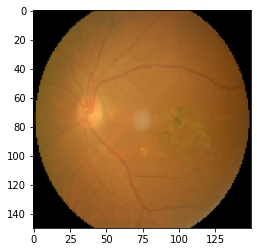

1/1 [==============================] - 0s 17ms/step
THOÁI HOÁ


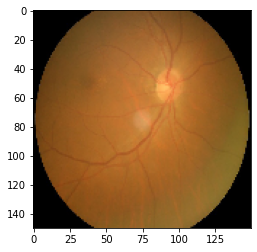

1/1 [==============================] - 0s 15ms/step
THOÁI HOÁ


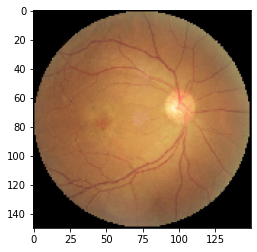

1/1 [==============================] - 0s 15ms/step
THOÁI HOÁ


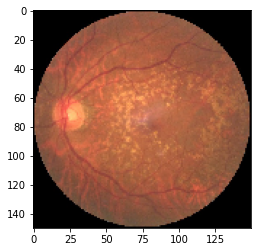

1/1 [==============================] - 0s 44ms/step
THOÁI HOÁ


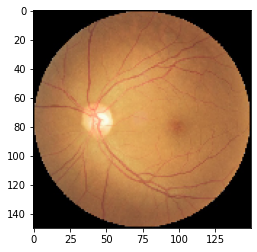

1/1 [==============================] - 0s 24ms/step
THOÁI HOÁ


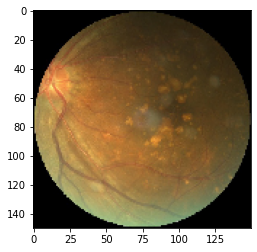

In [ ]:
# 5. Mắt Thoái hóa điểm vàng liên quan đến tuổi tác  - Age related Macular Degeneration (A)
test="/content/drive/MyDrive/Colab_Notebooks/project/Test/Age related Macular Degeneration"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='THOÁI HOÁ'
  if round(result[0][1])==1:
    prediction='ĐỤC THUỶ TINH THỂ'
  if round(result[0][2])==1:
    prediction='TIỂU ĐƯỜNG'
  if round(result[0][3])==1:
    prediction='TĂNG NHÃN ÁP'
  if round(result[0][4])==1:
    prediction='TĂNG HUYẾT ÁP'
  if round(result[0][5])==1:
    prediction='BÌNH THƯỜNG'
  if round(result[0][6])==1:
    prediction='BỆNH LÝ KHÁC'
  if round(result[0][7])==1:
    prediction='CẬN THỊ'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 58ms/step
THOÁI HOÁ


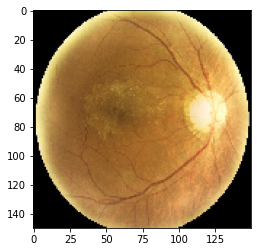

1/1 [==============================] - 0s 22ms/step
THOÁI HOÁ


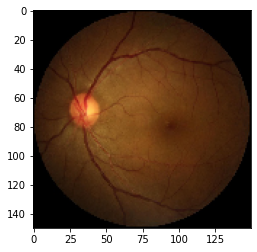

1/1 [==============================] - 0s 17ms/step
BỆNH LÝ KHÁC


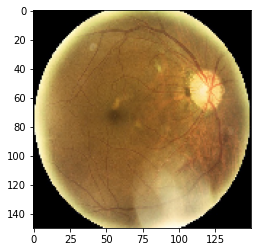

1/1 [==============================] - 0s 15ms/step
ĐỤC THUỶ TINH THỂ


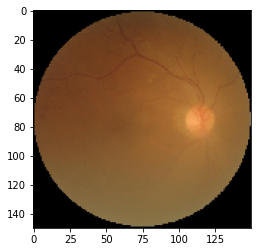

1/1 [==============================] - 0s 15ms/step
ĐỤC THUỶ TINH THỂ


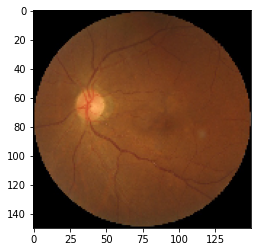

1/1 [==============================] - 0s 16ms/step
TĂNG HUYẾT ÁP


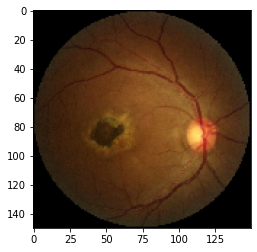

In [ ]:
# 6. Mắt Tăng huyết áp - Hypertension (H)
test="/content/drive/MyDrive/Colab_Notebooks/project/Test/Hypertension"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='THOÁI HOÁ'
  if round(result[0][1])==1:
    prediction='ĐỤC THUỶ TINH THỂ'
  if round(result[0][2])==1:
    prediction='TIỂU ĐƯỜNG'
  if round(result[0][3])==1:
    prediction='TĂNG NHÃN ÁP'
  if round(result[0][4])==1:
    prediction='TĂNG HUYẾT ÁP'
  if round(result[0][5])==1:
    prediction='BÌNH THƯỜNG'
  if round(result[0][6])==1:
    prediction='BỆNH LÝ KHÁC'
  if round(result[0][7])==1:
    prediction='CẬN THỊ'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 15ms/step
CẬN THỊ


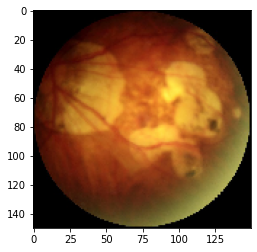

1/1 [==============================] - 0s 17ms/step
CẬN THỊ


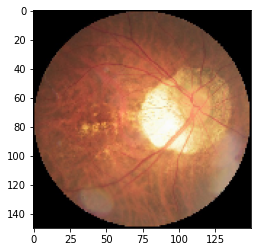

1/1 [==============================] - 0s 17ms/step
CẬN THỊ


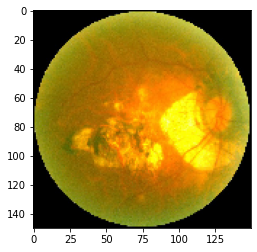

1/1 [==============================] - 0s 21ms/step
CẬN THỊ


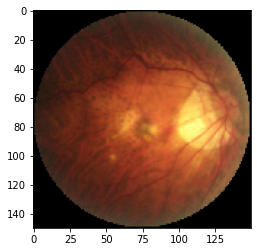

1/1 [==============================] - 0s 16ms/step
CẬN THỊ


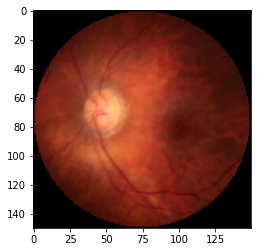

1/1 [==============================] - 0s 24ms/step
CẬN THỊ


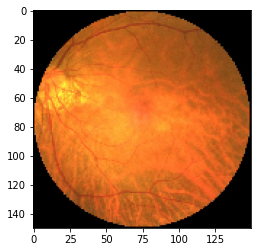

In [ ]:
# 7. Mắt Cận thị thoái hóa - Pathological Myopia (P)
test="/content/drive/MyDrive/Colab_Notebooks/project/Test/Pathological Myopia"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='THOÁI HOÁ'
  if round(result[0][1])==1:
    prediction='ĐỤC THUỶ TINH THỂ'
  if round(result[0][2])==1:
    prediction='TIỂU ĐƯỜNG'
  if round(result[0][3])==1:
    prediction='TĂNG NHÃN ÁP'
  if round(result[0][4])==1:
    prediction='TĂNG HUYẾT ÁP'
  if round(result[0][5])==1:
    prediction='BÌNH THƯỜNG'
  if round(result[0][6])==1:
    prediction='BỆNH LÝ KHÁC'
  if round(result[0][7])==1:
    prediction='CẬN THỊ'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 24ms/step
BỆNH LÝ KHÁC


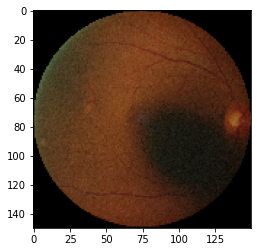

1/1 [==============================] - 0s 15ms/step
BỆNH LÝ KHÁC


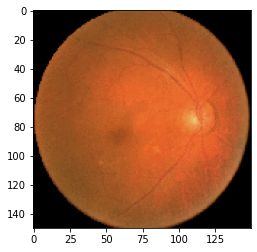

1/1 [==============================] - 0s 16ms/step
BỆNH LÝ KHÁC


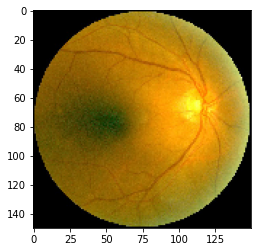

1/1 [==============================] - 0s 15ms/step
BỆNH LÝ KHÁC


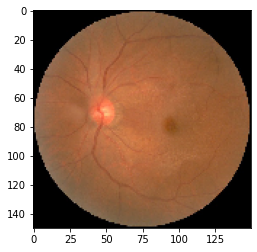

1/1 [==============================] - 0s 23ms/step
BỆNH LÝ KHÁC


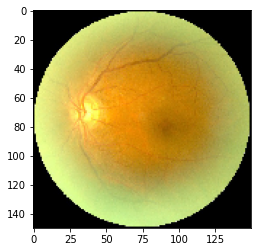

1/1 [==============================] - 0s 17ms/step
BỆNH LÝ KHÁC


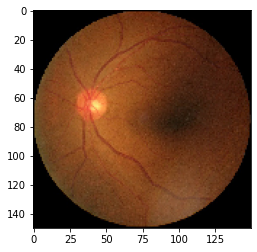

In [ ]:
# 8. Mắt Các bệnh bất thường khác - Other diseases/abnormalities (O)
test="/content/drive/MyDrive/Colab_Notebooks/project/Test/Other diseases_abnormalities"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='THOÁI HOÁ'
  if round(result[0][1])==1:
    prediction='ĐỤC THUỶ TINH THỂ'
  if round(result[0][2])==1:
    prediction='TIỂU ĐƯỜNG'
  if round(result[0][3])==1:
    prediction='TĂNG NHÃN ÁP'
  if round(result[0][4])==1:
    prediction='TĂNG HUYẾT ÁP'
  if round(result[0][5])==1:
    prediction='BÌNH THƯỜNG'
  if round(result[0][6])==1:
    prediction='BỆNH LÝ KHÁC'
  if round(result[0][7])==1:
    prediction='CẬN THỊ'
  print(prediction)
  plt.show()